In [1]:
# import library
import os
import sys
import polars as pl
import numpy as np
import pandas as pd

In [2]:
# import data with pl
df = pl.read_excel("bank-grille-score.xlsx")

In [3]:
# head of data
print(df.head())

shape: (5, 7)
┌────────┬─────────┬─────┬──────────┬─────────────┬──────────┬─────┐
│ sex    ┆ married ┆ car ┆ save_act ┆ current_act ┆ mortgage ┆ pep │
│ ---    ┆ ---     ┆ --- ┆ ---      ┆ ---         ┆ ---      ┆ --- │
│ str    ┆ str     ┆ str ┆ str      ┆ str         ┆ str      ┆ str │
╞════════╪═════════╪═════╪══════════╪═════════════╪══════════╪═════╡
│ FEMALE ┆ NO      ┆ NO  ┆ NO       ┆ NO          ┆ NO       ┆ YES │
│ MALE   ┆ YES     ┆ YES ┆ NO       ┆ YES         ┆ YES      ┆ NO  │
│ FEMALE ┆ YES     ┆ YES ┆ YES      ┆ YES         ┆ NO       ┆ NO  │
│ FEMALE ┆ YES     ┆ NO  ┆ NO       ┆ YES         ┆ NO       ┆ NO  │
│ FEMALE ┆ YES     ┆ NO  ┆ YES      ┆ NO          ┆ NO       ┆ NO  │
└────────┴─────────┴─────┴──────────┴─────────────┴──────────┴─────┘


In [4]:
# nombre d'observations
df.shape

(600, 7)

In [5]:
# liste of columns and types
df.columns

['sex', 'married', 'car', 'save_act', 'current_act', 'mortgage', 'pep']

In [6]:
y = df["pep"]

X = df.drop("pep")

# occurance of each value
y.value_counts()

pep,count
str,u32
"""YES""",274
"""NO""",326


In [7]:
# encode each variable to numerical 0 or 1
X = X.to_dummies(drop_first=True)

In [8]:
X

sex_MALE,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES
u8,u8,u8,u8,u8,u8
0,0,0,0,0,0
1,1,1,0,1,1
0,1,1,1,1,0
0,1,0,0,1,0
0,1,0,1,0,0
…,…,…,…,…,…
0,0,1,1,1,1
0,1,1,1,1,0
0,1,1,1,0,0


In [9]:
# nNumber of columns
X.shape

(600, 6)

In [10]:
# version of scikit-learn
import sklearn
print(sklearn.__version__)

1.5.2


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Convert y to numeric (0, 1)
y_numeric = (y == "YES").cast(pl.Int8)

# Convert X to numpy array for sklearn
X_numpy = X.to_numpy()
y_numpy = y_numeric.to_numpy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=0)

# Create and train the model
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.66      0.60        61
           1       0.55      0.44      0.49        59

    accuracy                           0.55       120
   macro avg       0.55      0.55      0.54       120
weighted avg       0.55      0.55      0.54       120



In [12]:
# coefficients of the model
model.coef_

array([[ 0.21891215, -0.89578646, -0.01467361, -0.23206962,  0.11343007,
        -0.05089988]])

## **Sélection de variables**

In [13]:
# instancier le modele stratifiedKFold
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)




In [14]:
# Instancier le modele de RFECV
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(random_state=0), cv=skf, scoring="accuracy")


Cross-validation scores for each number of features:
Number of features:  1, CV Accuracy: 0.6033
Number of features:  2, CV Accuracy: 0.6033
Number of features:  3, CV Accuracy: 0.5850
Number of features:  4, CV Accuracy: 0.5900
Number of features:  5, CV Accuracy: 0.5833
Number of features:  6, CV Accuracy: 0.5817

Optimal number of features: 1


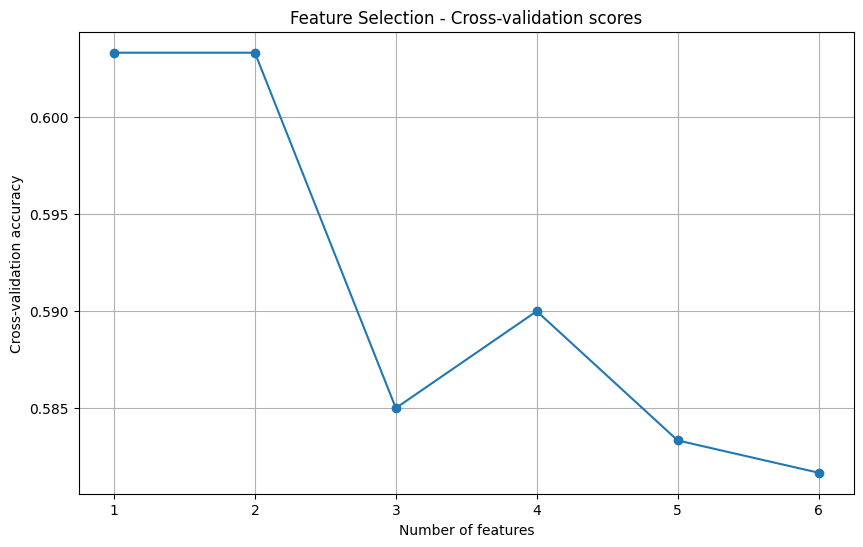

In [19]:
# Fit RFECV
rfecv.fit(X_numpy, y_numpy)

# Get the CV results for each number of features
n_features = [i for i in range(1, len(rfecv.cv_results_['mean_test_score']) + 1)]
cv_scores = rfecv.cv_results_['mean_test_score']

# Create a simple visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_features, cv_scores, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Cross-validation accuracy')
plt.title('Feature Selection - Cross-validation scores')
plt.grid(True)

# Print the scores
print("\nCross-validation scores for each number of features:")
for n, score in zip(n_features, cv_scores):
    print(f"Number of features: {n:2d}, CV Accuracy: {score:.4f}")

print(f"\nOptimal number of features: {rfecv.n_features_}")

In [20]:
# Coefficients of the model
rfecv.ranking_

array([3, 1, 6, 2, 5, 4])

In [21]:
# Get feature names from X
feature_names = X.columns

# Create a dataframe with features and their rankings
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': rfecv.ranking_
})

# Sort by ranking (1 means selected, higher numbers mean order of elimination)
feature_importance = feature_importance.sort_values('Ranking')

print("Selected features (Ranking = 1):")
print(feature_importance[feature_importance['Ranking'] == 1])
print("\nEliminated features (Ranking > 1):")
print(feature_importance[feature_importance['Ranking'] > 1])

Selected features (Ranking = 1):
       Feature  Ranking
1  married_YES        1

Eliminated features (Ranking > 1):
           Feature  Ranking
3     save_act_YES        2
0         sex_MALE        3
5     mortgage_YES        4
4  current_act_YES        5
2          car_YES        6


In [22]:
from sklearn.metrics import confusion_matrix

# Select only the two most important features
selected_features = ['married_YES', 'save_act_YES']
X_selected = X[selected_features]
X_selected_numpy = X_selected.to_numpy()

# Create and train the logistic regression model
new_model = LogisticRegression(random_state=0)
new_model.fit(X_selected_numpy, y_numpy)

# Print coefficients and intercept
print("Coefficients:")
for feature, coef in zip(selected_features, new_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"\nIntercept: {new_model.intercept_[0]:.4f}")

# Make predictions
y_pred_new = new_model.predict(X_selected_numpy)

# Create confusion matrix

conf_matrix = confusion_matrix(y_numpy, y_pred_new)
print("\nConfusion Matrix:")
print(conf_matrix)

Coefficients:
married_YES: -0.7804
save_act_YES: -0.2931

Intercept: 0.5398

Confusion Matrix:
[[242  84]
 [154 120]]
